### 回歸問題

- MAE, Mean Absolute Error
- MSE, Mean Square Error
- RMSE, Root Mean Square Error
- [R-square](https://zh.wikipedia.org/zh-tw/%E5%86%B3%E5%AE%9A%E7%B3%BB%E6%95%B0)

### 一般標準
```
R² > 0.7：通常被認為是很好的模型，表示模型可以解釋大部分的變異。
0.4 < R² <= 0.7：被認為是中等模型，表示模型可以解釋一部分的變異，但仍有較多未解釋的變異。
R² <= 0.4：表示模型表現較差，需要改進模型或使用更複雜的特徵工程來提高性能。
```

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 載入波士頓房價資料集
boston = pd.read_csv('dataset/Student_Performance.csv')

# 獲取特徵值和目標值
X = boston.drop('Performance Index', axis=1)
y = boston['Performance Index']

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 預測結果
predictions = model.predict(X_test)

# 計算 MSE
mse = mean_squared_error(y_test, predictions)

# 計算 MAE
mae = mean_absolute_error(predictions, y_test)

# 計算 R-squared
r2 = r2_score(predictions, y_test)

# 評估模型
print('MSE:', mse)
print("MAE:", mae)
print("R-squared:", r2)



MSE: 4.358598457324996
MAE: 1.6554267675977483
R-squared: 0.9879414153825772
0.9880852065074374


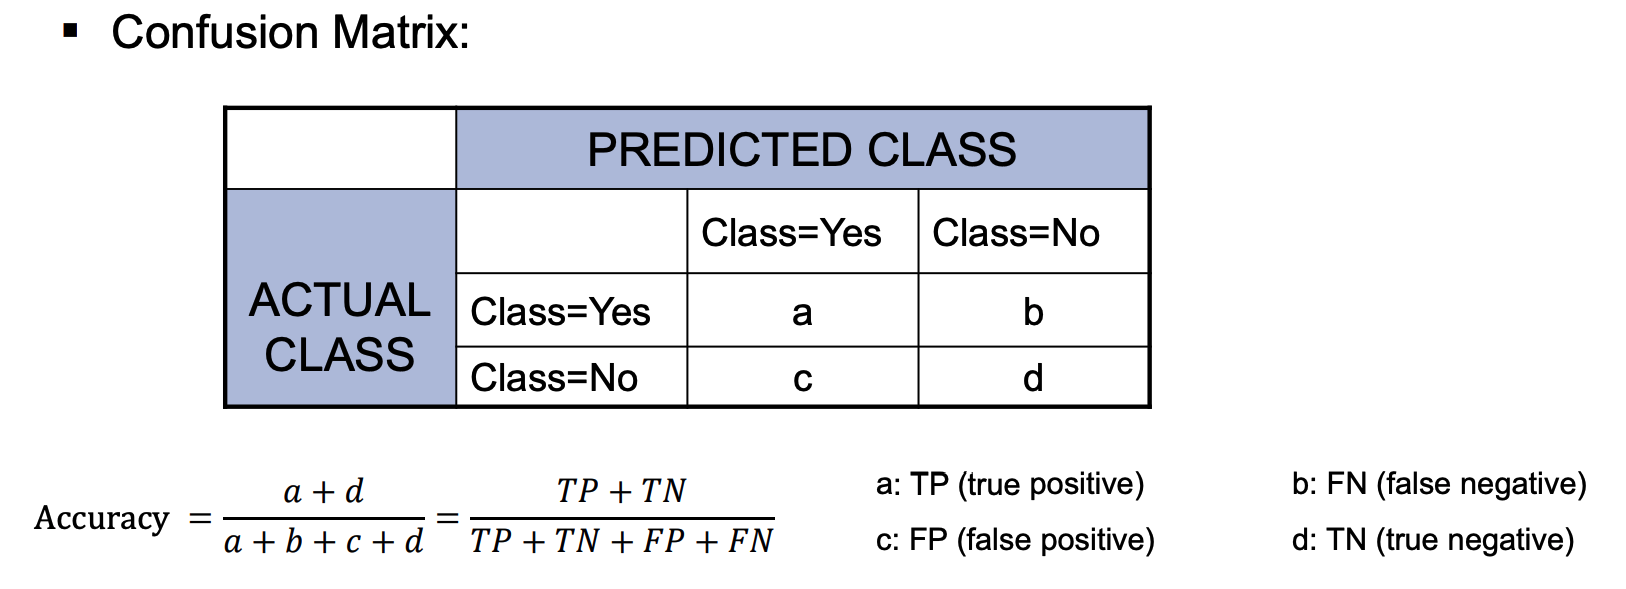

- 準確率 (Accuracy)：模型正確預測的總體比例
- 精確率 (Precision)：模型預測為正的樣本中，真正是正例的比例
- 召回率 (Recall)：模型中的正例被模型正確預測為正的比例
- F1 分數 (F1-score)：精確率和召回率的調和平均值

例如，如果 TP = 100，FN = 20，FP = 10，TN = 170，則：

- 準確率 = (TP + TN) / (TP + FP + FN + TN) = 270 / 300 = 0.9
- 精確率 = TP / (TP + FP) = 100 / 110 = 0.91
- 召回率 = TP / (TP + FN) = 100 / 120 = 0.83
- F1 分數 = 2 * (Precision * Recall) / (Precision + Recall) = 2 * 0.91 * 0.83 / (0.91 + 0.83) = 0.87

### 應用情境範例
- 在醫療診斷中，召回率通常比精確率更重要。這是因為，如果模型漏診了一個病人，可能會導致嚴重的後果。

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# 讀取資料
data = pd.read_csv('dataset/titanic.csv')

# 處理缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

labelencoder = LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['Embarked'] = labelencoder.fit_transform(data['Embarked'])

# 選取特徵
features = ['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']

# 建立模型
model = LogisticRegression()

# 訓練模型
model.fit(data[features], data['Survived'])

# 預測結果
predictions = model.predict_proba(data[features])
print(predictions)
# # 計算混淆矩陣
# confusion_matrix = confusion_matrix(data['Survived'], predictions)

# # 輸出混淆矩陣
# print(confusion_matrix)


[[0.89691673 0.10308327]
 [0.07097731 0.92902269]
 [0.44737175 0.55262825]
 ...
 [0.47753443 0.52246557]
 [0.38702261 0.61297739]
 [0.90213303 0.09786697]]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 計算準確率
accuracy = accuracy_score(data['Survived'], predictions)

# 計算精確率
precision = precision_score(data['Survived'], predictions)

# 計算召回率
recall = recall_score(data['Survived'], predictions)

# 計算 F1 分數
f1 = f1_score(data['Survived'], predictions)

# 輸出結果
print('準確率：', accuracy)
print('精確率：', precision)
print('召回率：', recall)
print('F1 分數：', f1)

準確率： 0.7901234567901234
精確率： 0.7327327327327328
召回率： 0.7134502923976608
F1 分數： 0.722962962962963


## ROC AUC
- [補充 ROC](https://ithelp.ithome.com.tw/articles/10229049?sc=rss.qu)
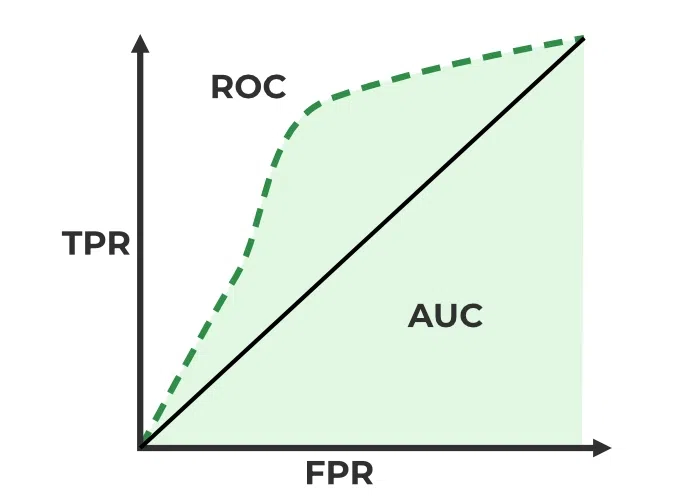

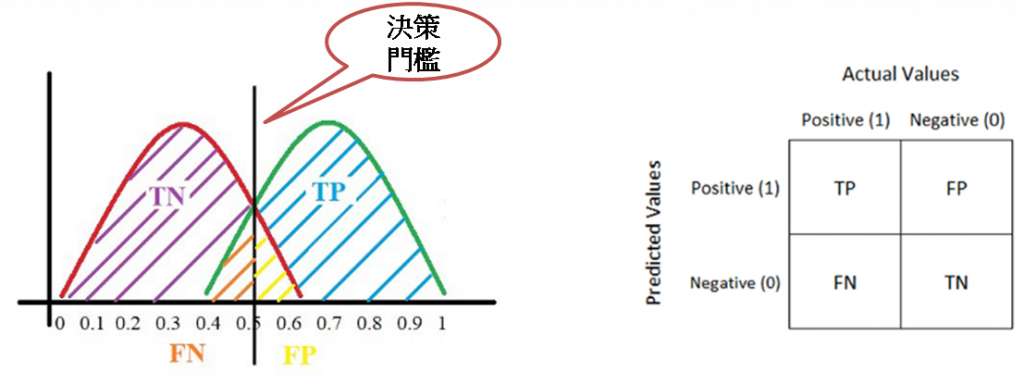
### 不同種的分佈
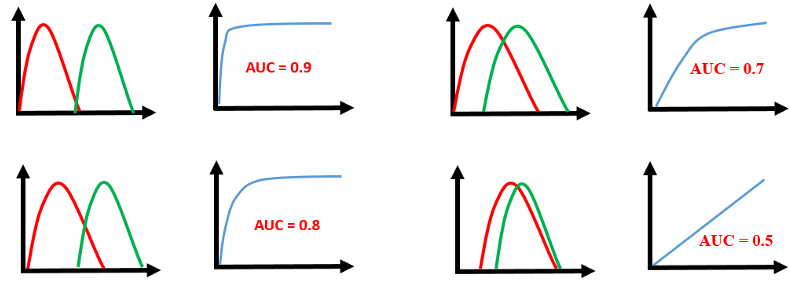

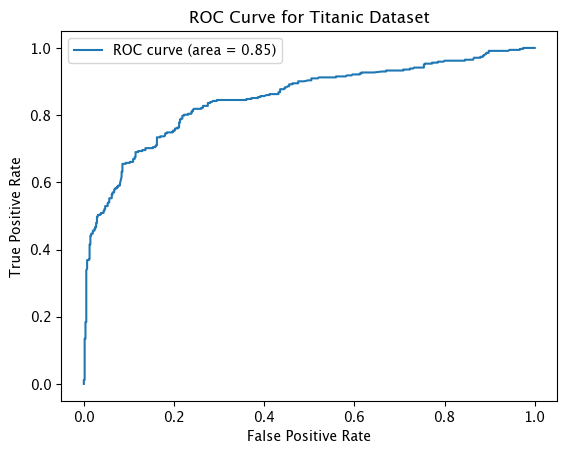

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

ls = [ele[1] for ele in predictions]

# 計算 ROC 曲線
fpr, tpr, thresholds = roc_curve(data['Survived'], ls)

# 計算 AUC
roc_auc = auc(fpr, tpr)

# 繪製 ROC 曲線
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Titanic Dataset')
plt.legend()
plt.show()
